In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_data = pd.read_csv('train.csv')

# Display the first few rows of the dataset
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Check for missing values
train_data.isnull().sum()

# Fill missing values in the 'Age' column with the median age
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Fill missing values in the 'Embarked' column with the most common port
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column as it has too many missing values
train_data.drop(columns=['Cabin'], inplace=True)

# Verify that there are no more missing values
train_data.isnull().sum()





PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# Summary statistics for numerical columns
train_data.describe()

# Summary statistics for categorical columns
train_data.describe(include=['O'])


,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,646


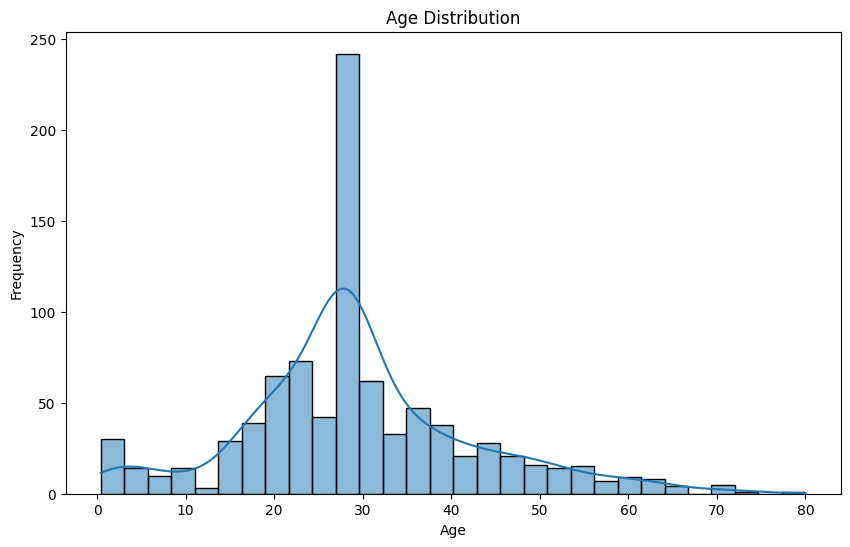

In [ ]:
# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


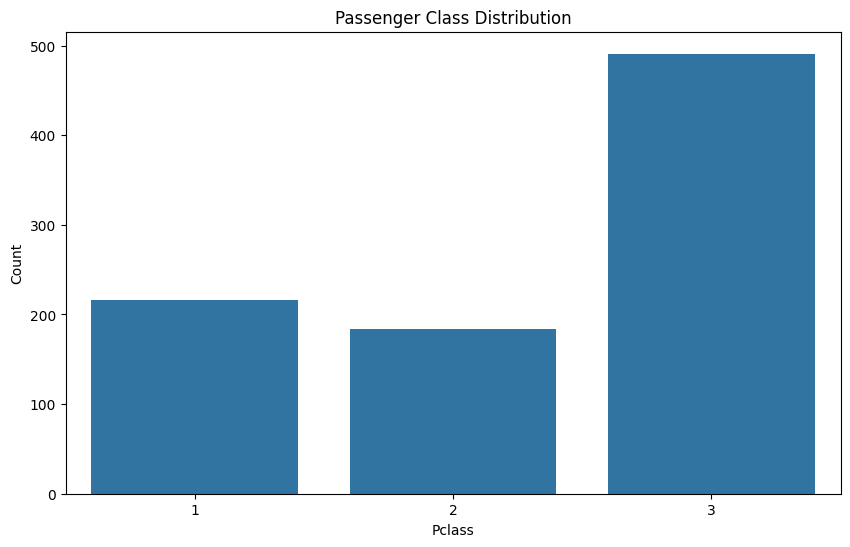

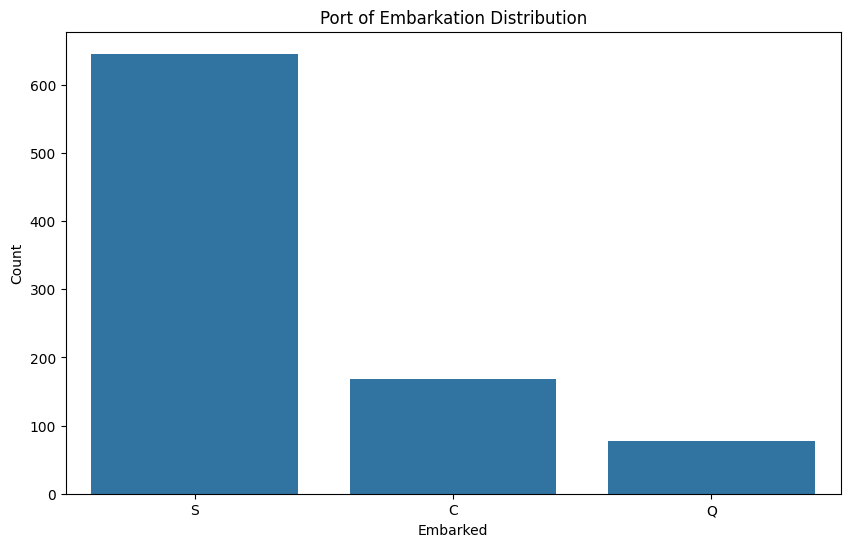

In [28]:
# Bar plot for Pclass
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Pclass')
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Bar plot for Embarked
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Embarked')
plt.title('Port of Embarkation Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()


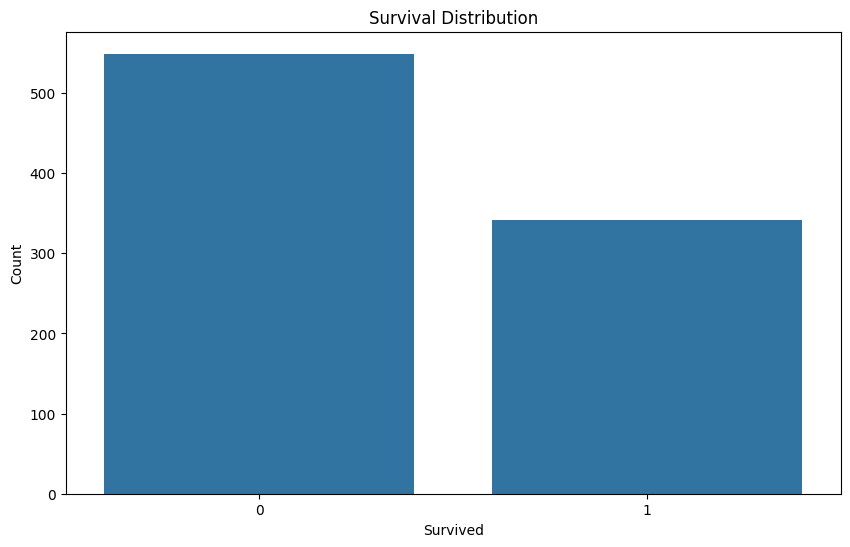

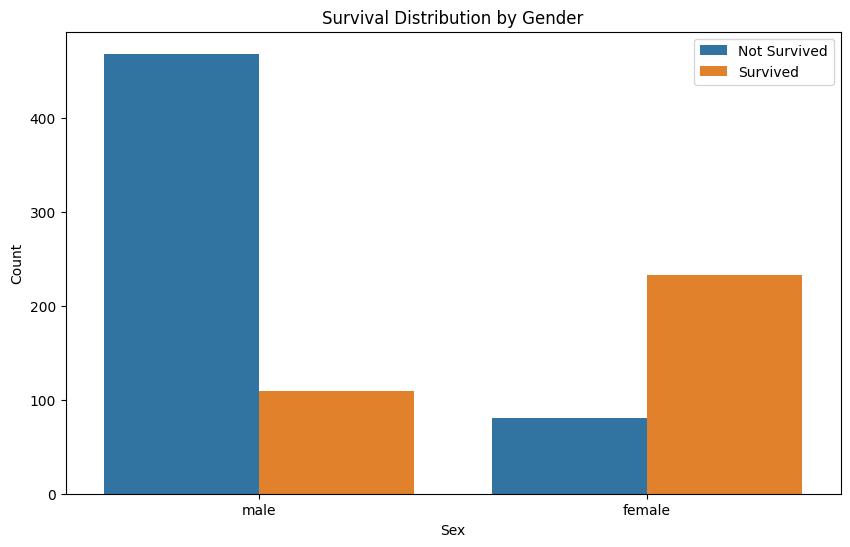

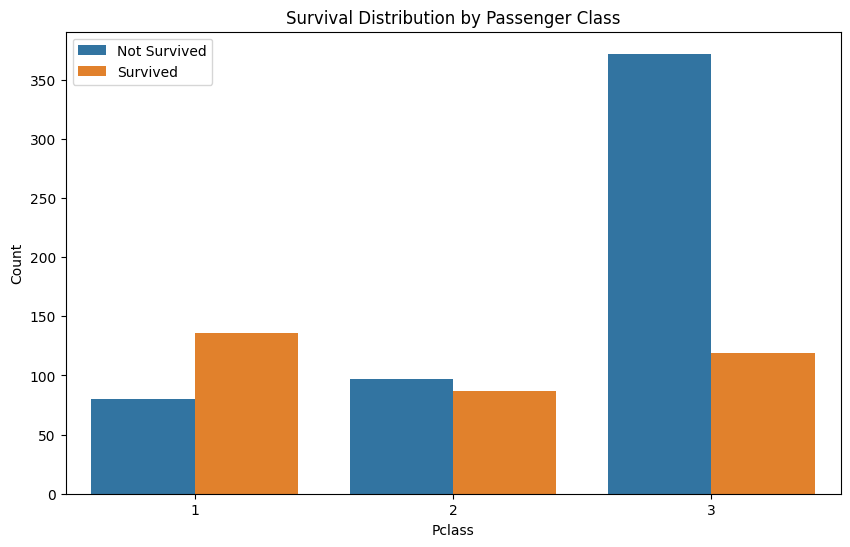

In [ ]:
# Bar plot for survival rate
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Survived')
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Survival rate by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Sex', hue='Survived')
plt.title('Survival Distribution by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

# Survival rate by passenger class
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Pclass', hue='Survived')
plt.title('Survival Distribution by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()


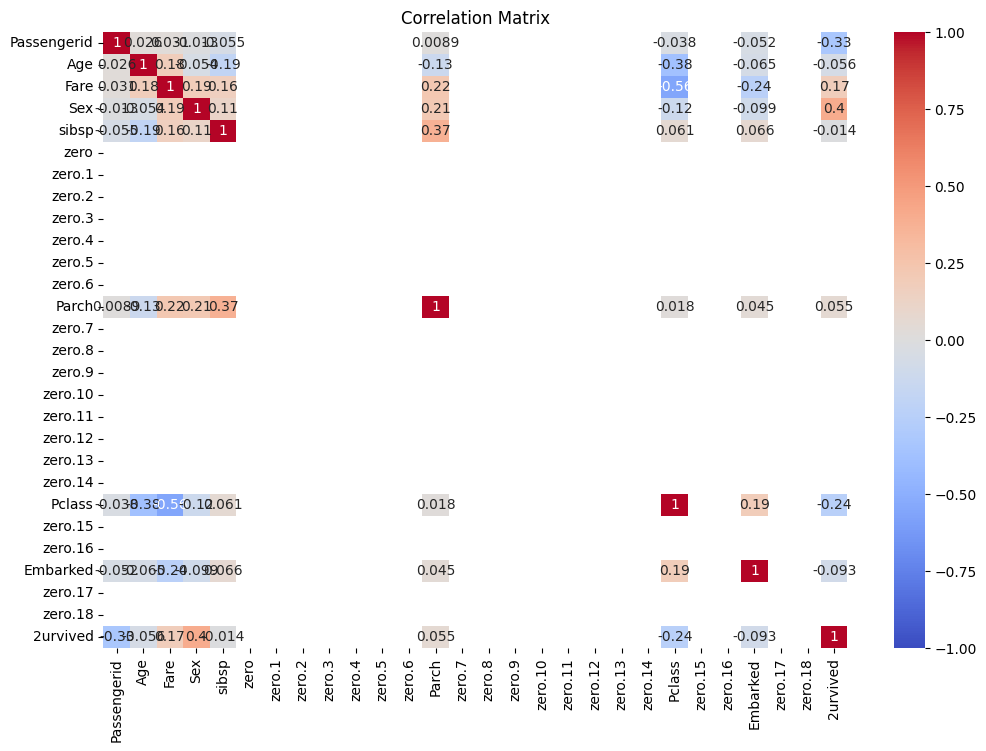

In [ ]:
# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(titanic_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [27]:
# Create a new feature for family size
train_data['FamilySize'] = train_data['SibSp'] + titanic_data['Parch'] + 1

# Create a new feature for whether the passenger was alone
train_data['IsAlone'] = (train_data['FamilySize'] == 1).astype(int)

# Create a new feature for the title of the passenger
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles into a single category
train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')

# View the modified dataset
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2.0,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2.0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2.0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0,1,Mr


In [35]:
# Save the cleaned dataset to a new CSV file
train_data.to_csv('train_cleaned.csv', index=False)
train_clean=pd.read_csv('train_cleaned.csv')

# Display the first few rows of the dataset
train_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2.0,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2.0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2.0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0,1,Mr


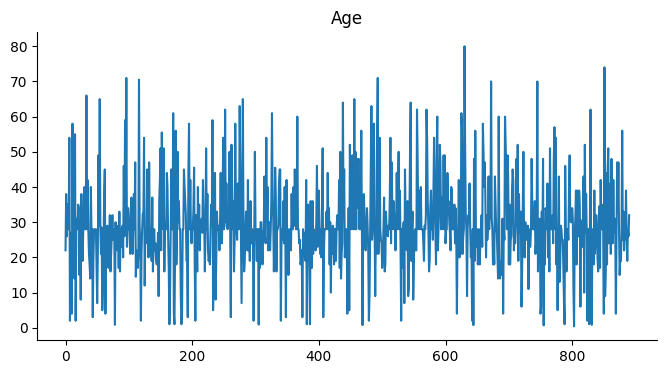

In [38]:

train_clean['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

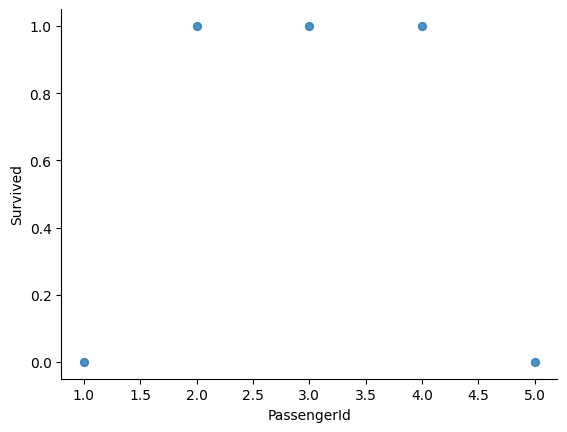

In [37]:

_df_8.plot(kind='scatter', x='PassengerId', y='Survived', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

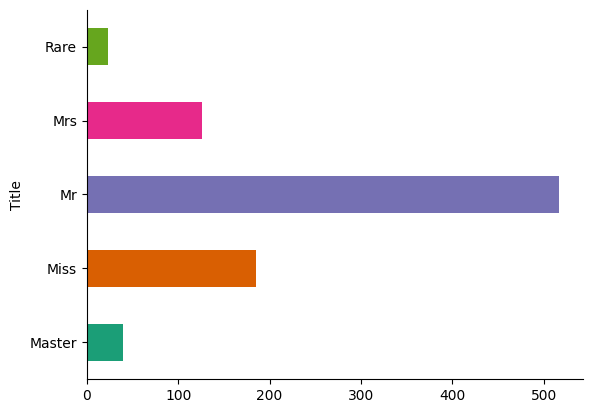

In [39]:

train_clean.groupby('Title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [32]:
#Here's a breakdown of each column in the Titanic dataset `train.csv` file, explaining what each column title means:

'''
1. PassengerId: Unique identifier for each passenger.
2. Survived: Survival status (0 = No, 1 = Yes).
3. Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
4. Name: Name of the passenger.
5. Sex: Gender of the passenger (male or female).
6. Age: Age of the passenger.
7. SibSp: Number of siblings/spouses aboard the Titanic.
   - Siblings: Brothers, sisters, stepbrothers, and stepsisters.
   - Spouses: Husband and wife.
8. Parch: Number of parents/children aboard the Titanic.
   - Parents: Mother and father.
   - Children: Daughters, sons, stepdaughters, and stepsons.
9. Ticket: Ticket number.
10. Fare: Passenger fare.
11.Cabin: Cabin number.
12. Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
'''

'\n1. PassengerId: Unique identifier for each passenger.\n2. Survived: Survival status (0 = No, 1 = Yes).\n3. Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).\n4. Name: Name of the passenger.\n5. Sex: Gender of the passenger (male or female).\n6. Age: Age of the passenger.\n7. SibSp: Number of siblings/spouses aboard the Titanic.\n   - Siblings: Brothers, sisters, stepbrothers, and stepsisters.\n   - Spouses: Husband and wife.\n8. Parch: Number of parents/children aboard the Titanic.\n   - Parents: Mother and father.\n   - Children: Daughters, sons, stepdaughters, and stepsons.\n9. Ticket: Ticket number.\n10. Fare: Passenger fare.\n11.Cabin: Cabin number.\n12. Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)\n'